In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [46]:
df=pd.read_csv('RFM/Sept_Data.csv')

In [47]:
df.head()

,Date,Customer ID (evar6),Orders,Revenue
0,1-Sep-22,09415aed9740fa73f80c8eed6566d49b,1,59900.0
1,1-Sep-22,0c559ab0e9fe2695d4f0e78205a47b5f,1,74893.0
2,1-Sep-22,10416cea02008e353aac5305de8caba4,1,16990.0
3,1-Sep-22,10637f6e9164900d019b1e07c94b50ad,6,419994.0
4,1-Sep-22,12cef843674e289904dff74c27d205a0,11,394666.0


In [48]:
df.count()

Date                   1106
Customer ID (evar6)    1104
Orders                 1106
Revenue                1106
dtype: int64

1. Monetary- Find the average revenue generated per order for a customer ID. Will send out loyalty notes to them for add-ons.
2. Freuquency- Find the total no of orders placed in the time period. High velocity customers, discounts to ensure they dont migrate to other websites.
3. Recency- Find the last date the customer has made a purchase. Fresh purchasers,send emails reminding them that discounts are still on.

In [213]:
df1=df.groupby(['Customer ID (evar6)']).sum().reset_index()
df2=df.groupby(['Customer ID (evar6)']).last().reset_index()

In [214]:
df1

,Customer ID (evar6),Orders,Revenue
0,034f7ebaaf83c86cf75536d00f2060d1,41,1426171.0
1,04512f3944eb16ecd2fb64c99306a790,2,11380.0
2,04cbd4b0b5a3c869b8624fff65650991,36,1480295.0
3,062294d950017e7105676920a96adfea,1,2999.0
4,088a31febad85f44e9791ef93238b10c,10,510127.0
...,...,...,...
198,f81cfe57dfa3027401ee9999f220ef7e,1,159900.0
199,fcb242a10e9a69ad3f9ac78d62fb817c,1,14999.0
200,fdba80cf8d63935dc586dd011eac7afd,15,815344.0
201,feaa5e787aef04bd3e5a5f83fe088f9a,4,266337.0


In [215]:
df1.dtypes

Customer ID (evar6)     object
Orders                   int64
Revenue                float64
dtype: object

In [216]:
df2

,Customer ID (evar6),Date,Orders,Revenue
0,034f7ebaaf83c86cf75536d00f2060d1,29-Sep-22,3,75013.0
1,04512f3944eb16ecd2fb64c99306a790,29-Sep-22,1,5690.0
2,04cbd4b0b5a3c869b8624fff65650991,30-Sep-22,1,9999.0
3,062294d950017e7105676920a96adfea,13-Sep-22,1,2999.0
4,088a31febad85f44e9791ef93238b10c,28-Sep-22,2,7776.0
...,...,...,...,...
198,f81cfe57dfa3027401ee9999f220ef7e,21-Sep-22,1,159900.0
199,fcb242a10e9a69ad3f9ac78d62fb817c,22-Sep-22,1,14999.0
200,fdba80cf8d63935dc586dd011eac7afd,30-Sep-22,1,159900.0
201,feaa5e787aef04bd3e5a5f83fe088f9a,5-Sep-22,1,63794.0


In [117]:
df2.count()

Customer ID (evar6)    203
Date                   203
Orders                 203
Revenue                203
dtype: int64

In [218]:
df2=df2.drop(['Orders'], axis=1)
df2=df2.drop(['Revenue'], axis=1)

In [219]:
df2

,Customer ID (evar6),Date
0,034f7ebaaf83c86cf75536d00f2060d1,29-Sep-22
1,04512f3944eb16ecd2fb64c99306a790,29-Sep-22
2,04cbd4b0b5a3c869b8624fff65650991,30-Sep-22
3,062294d950017e7105676920a96adfea,13-Sep-22
4,088a31febad85f44e9791ef93238b10c,28-Sep-22
...,...,...
198,f81cfe57dfa3027401ee9999f220ef7e,21-Sep-22
199,fcb242a10e9a69ad3f9ac78d62fb817c,22-Sep-22
200,fdba80cf8d63935dc586dd011eac7afd,30-Sep-22
201,feaa5e787aef04bd3e5a5f83fe088f9a,5-Sep-22


In [135]:
df2['Date']=pd.to_datetime(df2['Date'])

In [140]:
df2['Diff']=pd.Timestamp.now().normalize()-df2['Date']

In [144]:
df2['Diff']=df2['Diff'].dt.days

In [148]:
df2.dtypes

Customer ID (evar6)            object
Date                   datetime64[ns]
Diff                            int64
dtype: object

In [184]:
df3 = df1.merge(df2, how='inner', left_on=['Customer ID (evar6)'], right_on=['Customer ID (evar6)'])

In [185]:
df3

,Customer ID (evar6),Orders,Revenue,Date,Diff
0,034f7ebaaf83c86cf75536d00f2060d1,41,1426171.0,2022-09-29,18
1,04512f3944eb16ecd2fb64c99306a790,2,11380.0,2022-09-29,18
2,04cbd4b0b5a3c869b8624fff65650991,36,1480295.0,2022-09-30,17
3,062294d950017e7105676920a96adfea,1,2999.0,2022-09-13,34
4,088a31febad85f44e9791ef93238b10c,10,510127.0,2022-09-28,19
...,...,...,...,...,...
198,f81cfe57dfa3027401ee9999f220ef7e,1,159900.0,2022-09-21,26
199,fcb242a10e9a69ad3f9ac78d62fb817c,1,14999.0,2022-09-22,25
200,fdba80cf8d63935dc586dd011eac7afd,15,815344.0,2022-09-30,17
201,feaa5e787aef04bd3e5a5f83fe088f9a,4,266337.0,2022-09-05,42


<AxesSubplot:xlabel='Orders', ylabel='Density'>

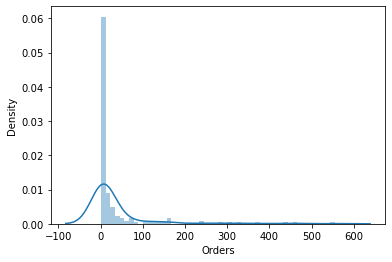

In [226]:
sns.distplot(df3['Orders'],bins=50)

In [187]:
df3.describe()

,Orders,Revenue,Diff
count,203.000000,2.030000e+02,203.000000
mean,33.487685,1.553722e+06,25.733990
std,80.712935,3.390660e+06,9.276724
min,1.000000,9.400000e+01,17.000000
25%,2.000000,5.740000e+04,18.000000
50%,4.000000,2.711140e+05,24.000000
75%,19.000000,9.381045e+05,32.000000
max,555.000000,2.030713e+07,46.000000


In [198]:
Rec=[]
for i in df3['Orders']:
    if i <20:
        Rec.append(4)
    elif i< 30 and i>20:
        Rec.append(3)
    elif i<40 and i>30:
        Rec.append(2)
    elif i<50 and i>40:
        Rec.append(1)
    else:
        Rec.append(0)


In [188]:
Freq=[]
for i in df3['Orders']:
    if i <5:
        Freq.append(1)
    elif i< 15 and i>5:
        Freq.append(2)
    elif i<50 and i>15:
        Freq.append(3)
    elif i<555 and i>50:
        Freq.append(4)
    else:
        Freq.append(0)


In [224]:
Mon=[]
for i in df3['Revenue']:
    if i <50000:
        Mon.append(1)
    elif i<250000 and i>50000:
        Mon.append(2)
    elif i<1000000 and i>250000:
        Mon.append(3)
    elif i<30000000 and i>1000000:
        Mon.append(4)
    else:
        Mon.append(0)

        

In [203]:
df3['Mon']=Mon

In [204]:
df3['Freq']=Freq

In [205]:
df3['Rec']=Rec

In [206]:
df3

,Customer ID (evar6),Orders,Revenue,Date,Diff,Mon,Freq,Rec
0,034f7ebaaf83c86cf75536d00f2060d1,41,1426171.0,2022-09-29,18,4,3,1
1,04512f3944eb16ecd2fb64c99306a790,2,11380.0,2022-09-29,18,1,1,4
2,04cbd4b0b5a3c869b8624fff65650991,36,1480295.0,2022-09-30,17,4,3,2
3,062294d950017e7105676920a96adfea,1,2999.0,2022-09-13,34,1,1,4
4,088a31febad85f44e9791ef93238b10c,10,510127.0,2022-09-28,19,3,2,4
...,...,...,...,...,...,...,...,...
198,f81cfe57dfa3027401ee9999f220ef7e,1,159900.0,2022-09-21,26,2,1,4
199,fcb242a10e9a69ad3f9ac78d62fb817c,1,14999.0,2022-09-22,25,1,1,4
200,fdba80cf8d63935dc586dd011eac7afd,15,815344.0,2022-09-30,17,3,0,4
201,feaa5e787aef04bd3e5a5f83fe088f9a,4,266337.0,2022-09-05,42,3,1,4


In [207]:
df3.to_csv('RFM_ouput.csv')